# Avance Proyecto 1: Análisis eploratorio

### Subtítulo:
Descripción de por qué es necesario

In [10]:
#Código

### Cantidad de compras registradas por la tienda:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Cargar el archivo
df = pd.read_csv('data/customer_purchases_train.csv')
total_ventas = len(df)

print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de usuarios:


In [19]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()

print(f"Cantidad de clientes únicos: {unique_customers}")


Cantidad de clientes únicos: 500


### Clientes con múltiples compras

SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


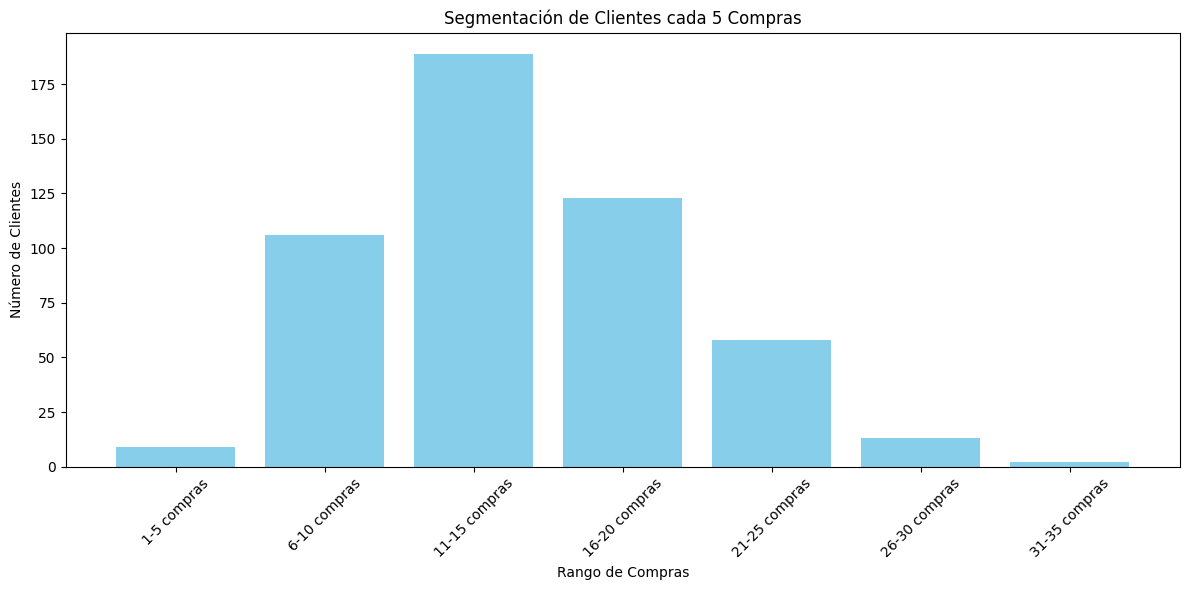


Segmentación con IDs guardada en 'segmentacion_clientes.json'


In [20]:
customer_freq = df['customer_id'].value_counts()

segmentos_con_ids = {}
segmentos_para_grafico = {}

for i in range(1, customer_freq.max() + 1, 5):
    segmento_min = i
    segmento_max = i + 4
    segment_name = f'{segmento_min}-{segmento_max} compras'
    
    # Filtrar clientes en este segmento
    clientes_segmento = customer_freq[
        (customer_freq >= segmento_min) & (customer_freq <= segmento_max)
    ].index.tolist()
    
    if clientes_segmento:
        segmentos_con_ids[segment_name] = {
            'cantidad_clientes': len(clientes_segmento),
            'ids_clientes': clientes_segmento
        }
        segmentos_para_grafico[segment_name] = len(clientes_segmento)

# Mostrar segmentos
print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for segmento, cantidad in segmentos_para_grafico.items():
    print(f"{segmento}: {cantidad} clientes")

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(segmentos_para_grafico.keys(), segmentos_para_grafico.values(), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar segmentación con IDs para uso futuro
segmentos_para_guardar = {
    segmento: {
        'cantidad_clientes': info['cantidad_clientes'],
        'ids_clientes': info['ids_clientes']
    }
    for segmento, info in segmentos_con_ids.items()
}

with open('segmentacion_clientes.json', 'w') as f:
    json.dump(segmentos_para_guardar, f, indent=2)

print(f"\nSegmentación con IDs guardada en 'segmentacion_clientes.json'")

### Genero de los usuarios

SEGMENTACIÓN POR GÉNERO:
Male: 195 clientes
Female: 192 clientes
No especificado: 113 clientes


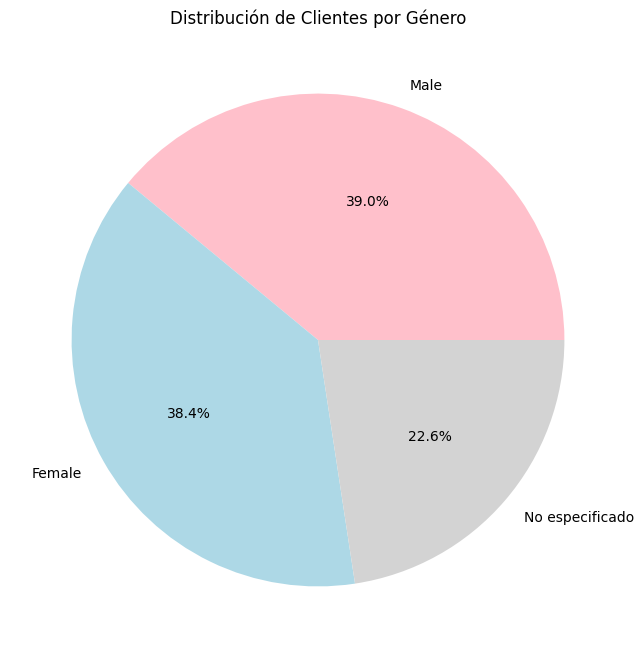


Segmentación guardada en 'segmentacion_genero.json'


In [26]:
customer_genders = df.groupby('customer_id')['customer_gender'].first()
genero_counts = customer_genders.fillna('no_especificado').value_counts()

# Crear segmentación
segmentacion_genero = {}
for genero in genero_counts.index:
    if genero == 'no_especificado':
        clientes_genero = customer_genders[customer_genders.isna()].index.tolist()
        display_name = 'No especificado'
    else:
        clientes_genero = customer_genders[customer_genders == genero].index.tolist()
        display_name = genero.capitalize()
    
    segmentacion_genero[f'genero_{genero}'] = {
        'cantidad_clientes': len(clientes_genero),
        'ids_clientes': clientes_genero,
        'genero': genero
    }

# Mostrar segmentos
print("SEGMENTACIÓN POR GÉNERO:")
for segmento, info in segmentacion_genero.items():
    print(f"{info['genero'].capitalize() if info['genero'] != 'no_especificado' else 'No especificado'}: {info['cantidad_clientes']} clientes")

# Gráfico pie con porcentajes
generos_display = []
cantidades = []
for info in segmentacion_genero.values():
    generos_display.append(info['genero'].capitalize() if info['genero'] != 'no_especificado' else 'No especificado')
    cantidades.append(info['cantidad_clientes'])

colors = ['pink', 'lightblue', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=generos_display, autopct='%1.1f%%', colors=colors)
plt.title('Distribución de Clientes por Género')
plt.show()

# Guardar en JSON
with open('segmentacion_genero.json', 'w') as f:
    json.dump(segmentacion_genero, f, indent=2)

print(f"\nSegmentación guardada en 'segmentacion_genero.json'")

### Rangos de edad de usuarios

EDADES DE LOS USUARIOS:
Edad mínima: 18 años
Edad máxima: 74 años
Edad promedio: 41.2 años
Edad mediana: 41.0 años

SEGMENTACIÓN POR EDAD:
18-25 años: 99 clientes
26-35 años: 102 clientes
36-45 años: 125 clientes
46+ años: 174 clientes


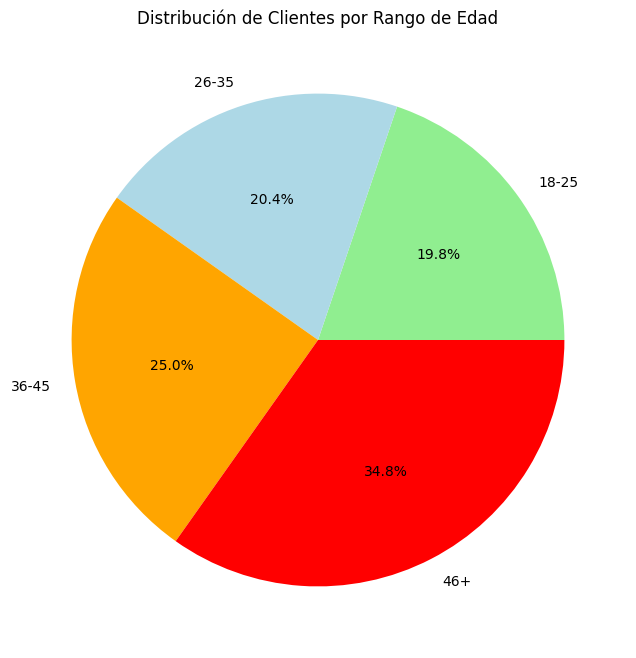


Segmentación por edad guardada en 'segmentacion_edad.json'


In [31]:
current_date = pd.to_datetime('2025-09-21')
df['edad'] = current_date.year - pd.to_datetime(df['customer_date_of_birth']).dt.year

# Obtener edad por cliente único
customer_ages = df.groupby('customer_id')['edad'].first()

# Mostrar edades de usuarios
print("EDADES DE LOS USUARIOS:")
print(f"Edad mínima: {customer_ages.min()} años")
print(f"Edad máxima: {customer_ages.max()} años")
print(f"Edad promedio: {customer_ages.mean():.1f} años")
print(f"Edad mediana: {customer_ages.median()} años")

# Segmentación por rangos de edad
rangos_edad = {
    '18-25': (18, 25),
    '26-35': (26, 35),
    '36-45': (36, 45),
    '46+': (46, customer_ages.max())
}

segmentacion_edad = {}

for rango, (min_edad, max_edad) in rangos_edad.items():
    if rango == '46+':
        clientes_rango = customer_ages[customer_ages >= min_edad].index.tolist()
    else:
        clientes_rango = customer_ages[(customer_ages >= min_edad) & (customer_ages <= max_edad)].index.tolist()
    
    if clientes_rango:
        segmentacion_edad[f'edad_{rango}'] = {
            'cantidad_clientes': len(clientes_rango),
            'ids_clientes': clientes_rango,
            'rango_edad': rango,
            'edad_min': min_edad,
            'edad_max': max_edad if rango != '46+' else None
        }

# Mostrar segmentos de edad
print("\nSEGMENTACIÓN POR EDAD:")
for segmento, info in segmentacion_edad.items():
    print(f"{info['rango_edad']} años: {info['cantidad_clientes']} clientes")

# Gráfico pie de edades
rangos_display = [info['rango_edad'] for info in segmentacion_edad.values()]
cantidades_edad = [info['cantidad_clientes'] for info in segmentacion_edad.values()]
colors_edad = ['lightgreen', 'lightblue', 'orange', 'red']

plt.figure(figsize=(8, 8))
plt.pie(cantidades_edad, labels=rangos_display, autopct='%1.1f%%', colors=colors_edad)
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()

# Guardar segmentación de edad en JSON
with open('segmentacion_edad.json', 'w') as f:
    json.dump(segmentacion_edad, f, indent=2)

print(f"\nSegmentación por edad guardada en 'segmentacion_edad.json'")